### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [918]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [919]:
data = pd.read_csv('data/coupons.csv')

In [920]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [921]:
for col in data.columns:
    print(col)
for col in data:
    print(data[col].unique())

destination
passanger
weather
temperature
time
coupon
expiration
gender
age
maritalStatus
has_children
education
occupation
income
car
Bar
CoffeeHouse
CarryAway
RestaurantLessThan20
Restaurant20To50
toCoupon_GEQ5min
toCoupon_GEQ15min
toCoupon_GEQ25min
direction_same
direction_opp
Y
['No Urgent Place' 'Home' 'Work']
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
[1 0]
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'


2. Investigate the dataset for missing or problematic data.

In [922]:
uniqueValuesBar = (data['Bar'].append(data['Bar'])).unique()
print(uniqueValuesBar)

['never' 'less1' '1~3' 'gt8' nan '4~8']


In [923]:
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [924]:
data[data['CarryAway'].isna()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,Home,Alone,Sunny,80,6PM,Bar,2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,0,0,1,0,1
8645,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0
8646,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0
8647,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

My Assumptions: 

3.1. when value is 'less1' across the data, we should replace with 0 since less 1 is really 0

3.2 in addition, when its never, we should replace it with 0 so we have a consistent representation of ranges and numbers

3.3 when value is 'gt8' we should replace with '>8'

In [925]:
data['CarryAway'] = data['CarryAway'].replace(['never','less1'],'0')

In [926]:
data['CarryAway'] = data['CarryAway'].replace(['gt8'],'>8')

In [927]:
data['has_children'] = data['has_children'].replace([1],'Yes')
data['has_children'] = data['has_children'].replace([0],'No')

In [928]:
uniqueValues = (data['CarryAway'].append(data['CarryAway'])).unique()
print(uniqueValues)

[nan '4~8' '1~3' '>8' '0']


In [929]:
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [930]:
uniqueValues = (data['maritalStatus'].append(data['RestaurantLessThan20'])).unique()
print(uniqueValues)

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed' '4~8'
 '1~3' 'less1' 'gt8' nan 'never']


In [931]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace(['gt8'],'>8');
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace(['never'],'0');
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace(['less1'],'0');

In [932]:
uniqueValues = (data['maritalStatus'].append(data['RestaurantLessThan20'])).unique()
print(uniqueValues)

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed' '4~8'
 '1~3' '0' '>8' nan]


In [933]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace(np.nan, '0')
data['CarryAway'] = data['CarryAway'].replace(np.nan, '0')

In [934]:
uniqueValues = (data['RestaurantLessThan20'].append(data['RestaurantLessThan20'])).unique()
print(uniqueValues)

['4~8' '1~3' '0' '>8']


In [935]:
uniqueValues = (data['CarryAway'].append(data['CarryAway'])).unique()
print(uniqueValues)

['0' '4~8' '1~3' '>8']


In [936]:
data['Restaurant20To50'] = data['Restaurant20To50'].replace(['gt8'],'>8');
data['Restaurant20To50'] = data['Restaurant20To50'].replace(['never'],'0');
data['Restaurant20To50'] = data['Restaurant20To50'].replace(['less1'],'0');
data['Restaurant20To50'] = data['Restaurant20To50'].replace(0, '0')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace(0, '0')
data['CarryAway'] = data['CarryAway'].replace(0, '0')

In [937]:
uniqueValues1 = (data['Restaurant20To50'].append(data['Restaurant20To50'])).unique()
print(uniqueValues1)
uniqueValues2 = (data['CarryAway'].append(data['CarryAway'])).unique()
print(uniqueValues2)
uniqueValues3 = (data['RestaurantLessThan20'].append(data['RestaurantLessThan20'])).unique()
print(uniqueValues3)

['1~3' '0' '>8' '4~8' nan]
['0' '4~8' '1~3' '>8']
['4~8' '1~3' '0' '>8']


In [938]:
uniqueValues4 = (data['CoffeeHouse'].append(data['CoffeeHouse'])).unique()
print(uniqueValues4)
data['CoffeeHouse'] = data['CoffeeHouse'].replace(['gt8'],'>8');
data['CoffeeHouse'] = data['CoffeeHouse'].replace(['never'],'0');
data['CoffeeHouse'] = data['CoffeeHouse'].replace(['less1'],'0');
data['CoffeeHouse'] = data['CoffeeHouse'].replace(np.nan, '0')
data['CoffeeHouse'] = data['CoffeeHouse'].replace(0, '0')
uniqueValues4 = (data['CoffeeHouse'].append(data['CoffeeHouse'])).unique()
print(uniqueValues4)

['never' 'less1' '4~8' '1~3' 'gt8' nan]
['0' '4~8' '1~3' '>8']


In [939]:
for col in data:
    print(data[col].unique())

['No Urgent Place' 'Home' 'Work']
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['Yes' 'No']
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair'

In [940]:
## replace ~ with -

data = data.replace('~', '-', regex=True)
data = data.replace('less1', '0', regex=True)
data = data.replace('never', '0', regex=True)
data = data.replace('gt8', '>8', regex=True)
data = data.replace('Education&Training&Library', 'Education & Training & Library', regex=True)
data = data.replace('below21', '<21', regex=True)
data = data.replace('50plus', '>=50', regex=True)
data.rename(columns = {'passanger':'passenger'}, inplace = True)
data['passenger'] = data['passenger'].replace('Alone', 'None')
data['Bar'] = data['Bar'].replace(np.nan, '0')
data['Restaurant20To50'] = data['Restaurant20To50'].replace(np.nan, '0')


In [941]:
# rename car column to vehicle type to better reflect driver status and specify a non driver as do not drive
data.rename(columns = {'car':'vehicletype'}, inplace = True)
data['vehicletype'] = data['vehicletype'].replace(np.nan, 'do not drive')

In [942]:
for col in data.columns:
    print(col)
for col in data:
    print(data[col].unique())

destination
passenger
weather
temperature
time
coupon
expiration
gender
age
maritalStatus
has_children
education
occupation
income
vehicletype
Bar
CoffeeHouse
CarryAway
RestaurantLessThan20
Restaurant20To50
toCoupon_GEQ5min
toCoupon_GEQ15min
toCoupon_GEQ25min
direction_same
direction_opp
Y
['No Urgent Place' 'Home' 'Work']
['None' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '>=50' '36' '<21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['Yes' 'No']
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education & Training & Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' '

In [943]:
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,None,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,0,4-8,1-3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,4-8,1-3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,0,4-8,1-3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,4-8,1-3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,0,4-8,1-3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [944]:
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt

In [945]:
Accepted_Coupon= data['Y'].value_counts()[1]
print('Total Accepted Coupon:' + str(Accepted_Coupon))
Did_Not_Accept_Coupon= data['Y'].value_counts()[0]
print('Total Did Not Accept Coupon:'+ str(Did_Not_Accept_Coupon))

Total_Observations = len(data)
print('Total observations:'+ str(Total_Observations))

Total_proportion_accepted= "{:.0%}".format(Accepted_Coupon/Total_Observations)
print('Total_proportion_accepted:'+ str(Total_proportion_accepted))

Total Accepted Coupon:7210
Total Did Not Accept Coupon:5474
Total observations:12684
Total_proportion_accepted:57%


5. Use a bar plot to visualize the `coupon` column.

['Accept Coupon' 'Did Not Accept Coupon']


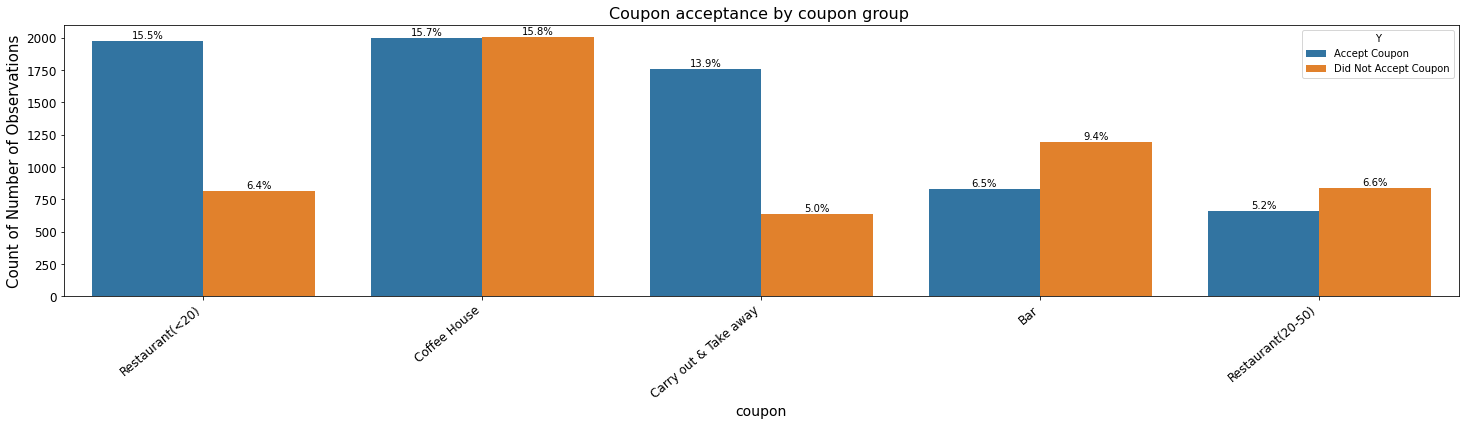

In [991]:
data['Y'] = data['Y'].replace(0, 'Did Not Accept Coupon')
data['Y'] = data['Y'].replace(1, 'Accept Coupon')
uniqueValuesY = (data['Y'].append(data['Y'])).unique()
print(uniqueValuesY)

plt.figure(figsize =(25,5))
ax = sns.countplot(data =data, x = 'coupon', hue = 'Y')
plt.xticks(size =12)
plt.xlabel('coupon', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count of Number of Observations', size = 15)
plt.title("Coupon acceptance by coupon group ", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

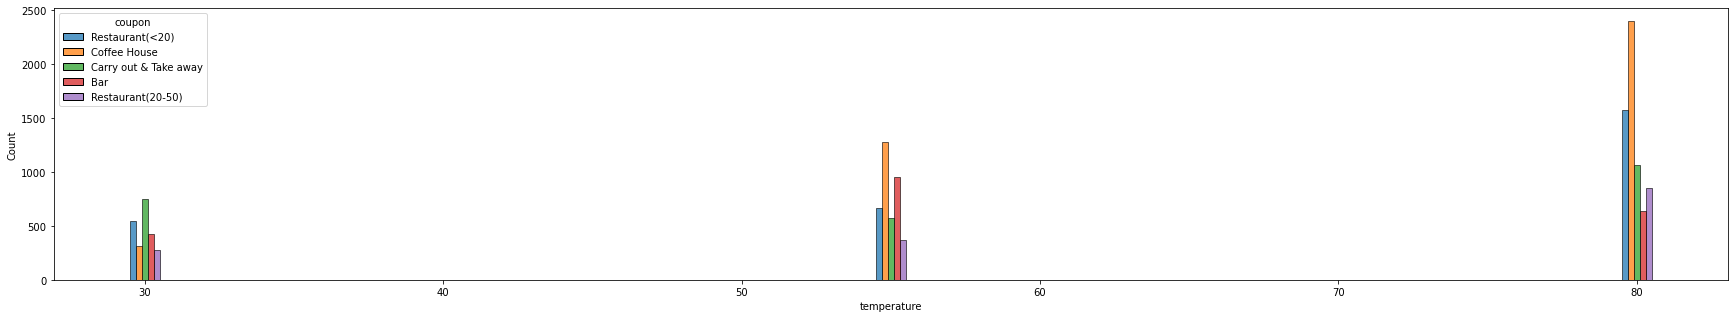

In [947]:
plt.figure(figsize =(30,5))
sns.histplot(data=data, x="temperature", hue="coupon",discrete=True,multiple ='dodge', binwidth=30)

['Accept Coupon' 'Did Not Accept Coupon']


<AxesSubplot:xlabel='temperature', ylabel='Count'>

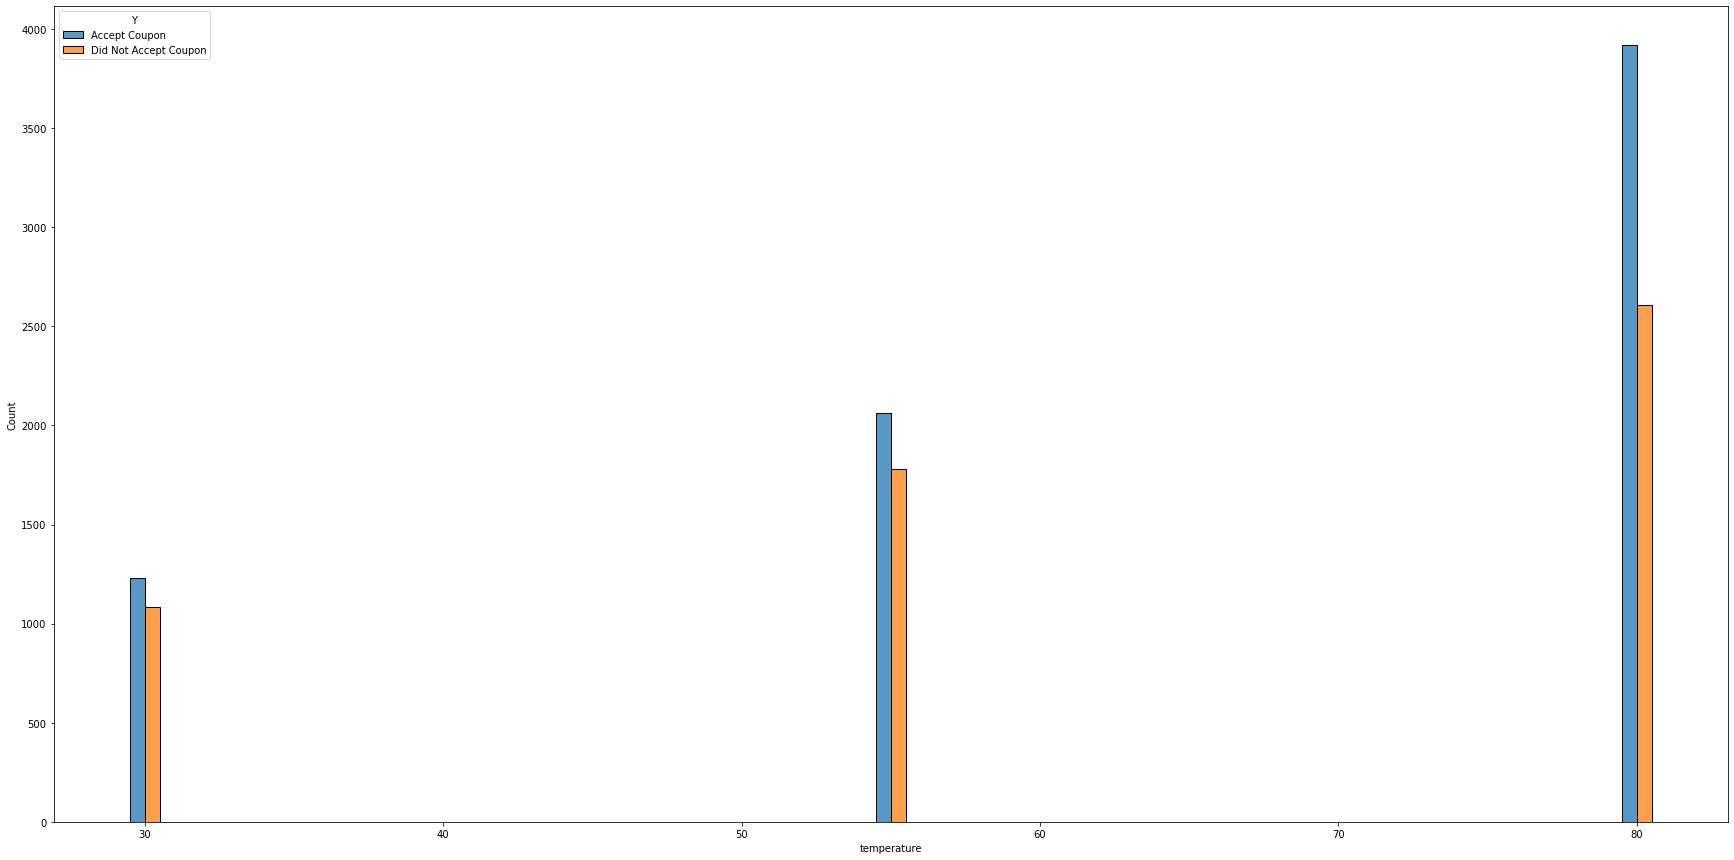

In [949]:
plt.figure(figsize =(30,15))
uniqueValuesY = (data['Y'].append(data['Y'])).unique()
print(uniqueValuesY)
sns.histplot(data=data, x="temperature", hue="Y", multiple="dodge",discrete=True, binwidth=20)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [950]:
for col in data.columns:
    print(col)
for col in data:
    print(data[col].unique())

destination
passenger
weather
temperature
time
coupon
expiration
gender
age
maritalStatus
has_children
education
occupation
income
vehicletype
Bar
CoffeeHouse
CarryAway
RestaurantLessThan20
Restaurant20To50
toCoupon_GEQ5min
toCoupon_GEQ15min
toCoupon_GEQ25min
direction_same
direction_opp
Y
['No Urgent Place' 'Home' 'Work']
['None' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '>=50' '36' '<21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['Yes' 'No']
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education & Training & Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' '

In [951]:
option1 = ['Bar']
# selecting rows based on condition
bar_coupons = data.loc[data['coupon'].isin(option1)]

In [952]:
for col in bar_coupons:
    print(bar_coupons[col].unique())

['No Urgent Place' 'Home' 'Work']
['Kid(s)' 'None' 'Friend(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[80 55 30]
['10AM' '6PM' '7AM' '10PM' '2PM']
['Bar']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '>=50' '36' '<21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['Yes' 'No']
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education & Training & Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'


2. What proportion of bar coupons were accepted?


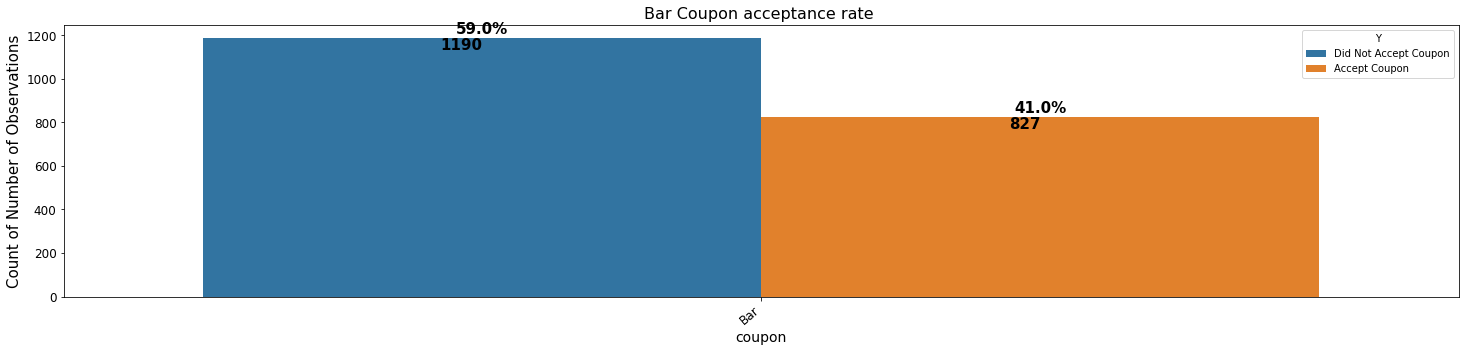

In [724]:
plt.figure(figsize =(25,5))
ax = sns.countplot(data =bar_coupons, x = 'coupon', hue = 'Y')
plt.xticks(size =12)
plt.xlabel('coupon', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count of Number of Observations', size = 15)
plt.title("Bar Coupon acceptance rate ", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(bar_coupons)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    value=p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=15)
    ax.annotate(value, (x, y), ha='right',va='top',weight='bold',size=15)
plt.show()

## 41% of bar coupons were accepted out of a total of 2017 bar coupons

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [953]:
replace_values = {'0' : 'went to a bar 3 or fewer times a month', '1-3' : 'went to a bar 3 or fewer times a month'}                                                                                          
bar_coupons= bar_coupons.replace({"Bar": replace_values}) 

In [954]:
for col in bar_coupons:
    print(bar_coupons[col].unique())

['No Urgent Place' 'Home' 'Work']
['Kid(s)' 'None' 'Friend(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[80 55 30]
['10AM' '6PM' '7AM' '10PM' '2PM']
['Bar']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '>=50' '36' '<21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['Yes' 'No']
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education & Training & Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'


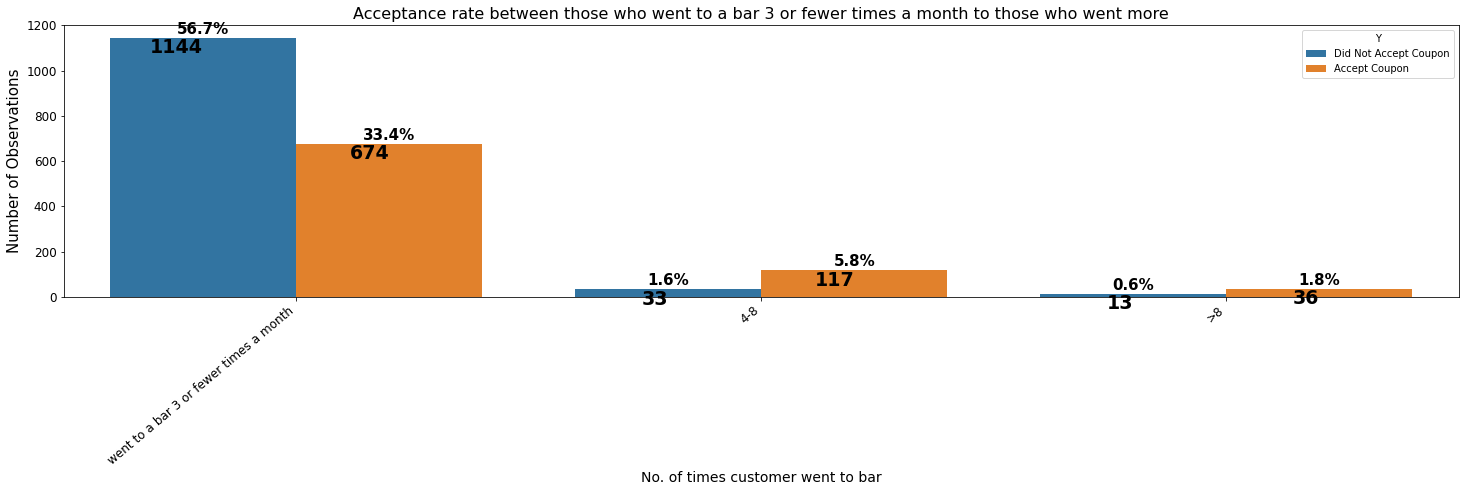

In [955]:
plt.figure(figsize =(25,5))
ax = sns.countplot(data =bar_coupons, x = 'Bar', hue = 'Y',  order = bar_coupons['Bar'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('No. of times customer went to bar', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of Observations', size = 15)
plt.title("Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(bar_coupons)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=15)
    ax.annotate(value, (x, y), ha='right',va='top',weight='bold',size=19)    
plt.show()

## 3. Conclusion: Acceptance rate was higher for those that went 3 or fewer times a month

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [956]:
## create a dataframe of only Bar coupons
option1 = ['Bar']
# selecting rows based on condition
bar_coupons_morethanonce = data.loc[data['coupon'].isin(option1)]

In [957]:
## remove all 0 visits to a bar
bar_coupons_morethanonce = bar_coupons_morethanonce[bar_coupons_morethanonce.Bar != '0']

In [958]:
##verify we only have more than once in our no. of bar visits
uniqueValues = (bar_coupons_morethanonce['Bar'].append(bar_coupons_morethanonce['Bar'])).unique()
print(uniqueValues)

['1-3' '>8' '4-8']


In [959]:
for col in bar_coupons_morethanonce:
    print(bar_coupons_morethanonce[col].unique())

['No Urgent Place' 'Home' 'Work']
['Friend(s)' 'None' 'Partner' 'Kid(s)']
['Sunny' 'Rainy' 'Snowy']
[80 55 30]
['10AM' '6PM' '7AM' '10PM' '2PM']
['Bar']
['1d' '2h']
['Male' 'Female']
['21' '26' '31' '>=50' '41' '36' '46' '<21']
['Single' 'Unmarried partner' 'Married partner' 'Divorced']
['No' 'Yes']
['Associates degree' 'Bachelors degree' 'Some college - no degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Student' 'Healthcare Support' 'Management' 'Unemployed'
 'Sales & Related' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Life Physical Social Science'
 'Retired' 'Computer & Mathematical'
 'Healthcare Practitioners & Technical' 'Personal Care & Service'
 'Architecture & Engineering' 'Arts Design Entertainment Sports & Media'
 'Protective Service' 'Business & Financial'
 'Food Preparation & Serving Related' 'Installation Maintenance & Repair'
 'Education & Training & Library' 'Community & Social Services'
 'Produc

In [960]:
##verify age groups before replace.
uniqueValues = (bar_coupons_morethanonce['age'].append(bar_coupons_morethanonce['age'])).unique()
print(uniqueValues)

['21' '26' '31' '>=50' '41' '36' '46' '<21']


In [961]:
replace_values2 = {'46' : 'over 25', '26' : 'over 25', '31' : 'over 25','>=50' : 'over 25', '41' : 'over 25','36' : 'over 25'}                                                                                          
bar_coupons_morethanonce = bar_coupons_morethanonce.replace({"age": replace_values2}) 

In [962]:
##verify we only have the age groups above 25 and others.
uniqueValues = (bar_coupons_morethanonce['age'].append(bar_coupons_morethanonce['age'])).unique()
print(uniqueValues)

['21' 'over 25' '<21']


In [963]:
for col in bar_coupons_morethanonce:
    print(bar_coupons_morethanonce[col].unique())

['No Urgent Place' 'Home' 'Work']
['Friend(s)' 'None' 'Partner' 'Kid(s)']
['Sunny' 'Rainy' 'Snowy']
[80 55 30]
['10AM' '6PM' '7AM' '10PM' '2PM']
['Bar']
['1d' '2h']
['Male' 'Female']
['21' 'over 25' '<21']
['Single' 'Unmarried partner' 'Married partner' 'Divorced']
['No' 'Yes']
['Associates degree' 'Bachelors degree' 'Some college - no degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Student' 'Healthcare Support' 'Management' 'Unemployed'
 'Sales & Related' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Life Physical Social Science'
 'Retired' 'Computer & Mathematical'
 'Healthcare Practitioners & Technical' 'Personal Care & Service'
 'Architecture & Engineering' 'Arts Design Entertainment Sports & Media'
 'Protective Service' 'Business & Financial'
 'Food Preparation & Serving Related' 'Installation Maintenance & Repair'
 'Education & Training & Library' 'Community & Social Services'
 'Production Occupations' 'Tra

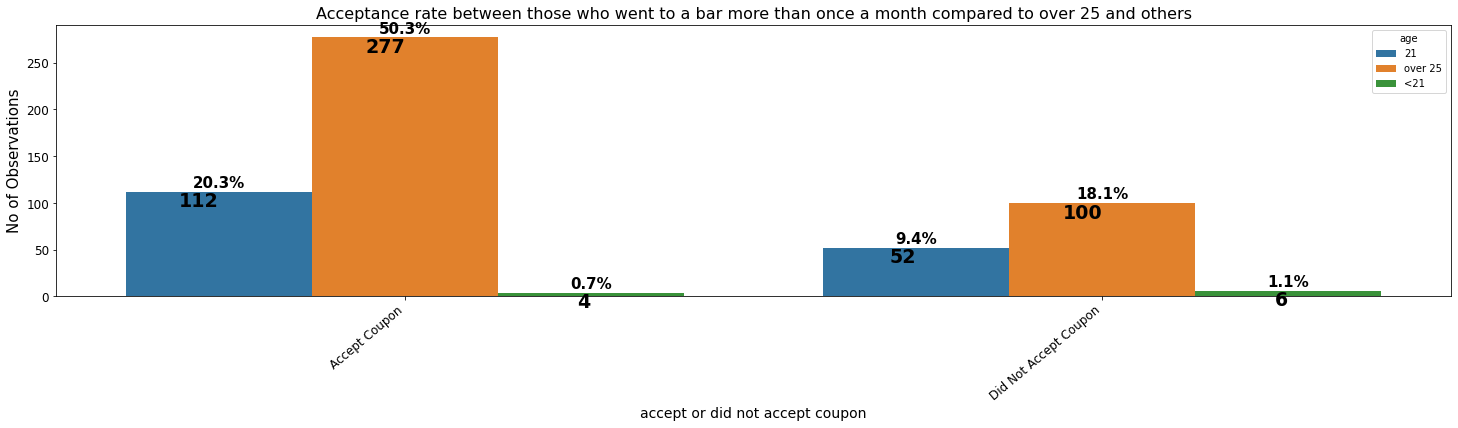

In [992]:

plt.figure(figsize =(25,5))
ax = sns.countplot(data =bar_coupons_morethanonce, x = 'Y', hue = 'age',order=bar_coupons_morethanonce['Y'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('accept or did not accept coupon', size = 14)
plt.yticks(size = 12)
plt.ylabel('No of Observations', size = 15)
plt.title("Acceptance rate between those who went to a bar more than once a month compared to over 25 and others", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(bar_coupons_morethanonce)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=15)
    ax.annotate(value, (x, y), ha='right',va='top',weight='bold',size=19)    
plt.show()

## 4. Conclusion: 49% accepted in the over 25 age group which is the highest acceptance rate in the no. of drivers who went to a bar more than once

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [965]:
##verify we only have the age groups above 25 and others.
uniqueValues = (bar_coupons_morethanonce['occupation'].append(bar_coupons_morethanonce['occupation'])).unique()
print(uniqueValues)

['Student' 'Healthcare Support' 'Management' 'Unemployed'
 'Sales & Related' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Life Physical Social Science'
 'Retired' 'Computer & Mathematical'
 'Healthcare Practitioners & Technical' 'Personal Care & Service'
 'Architecture & Engineering' 'Arts Design Entertainment Sports & Media'
 'Protective Service' 'Business & Financial'
 'Food Preparation & Serving Related' 'Installation Maintenance & Repair'
 'Education & Training & Library' 'Community & Social Services'
 'Production Occupations' 'Transportation & Material Moving'
 'Building & Grounds Cleaning & Maintenance']


In [966]:
## remove all Farming fishing and Forestry visits to a bar
bar_coupons_morethanonce = bar_coupons_morethanonce[bar_coupons_morethanonce.occupation != 'Farming Fishing & Forestry']

In [967]:
##verify we only have the age groups above 25 and others.
uniqueValues = (bar_coupons_morethanonce['occupation'].append(bar_coupons_morethanonce['occupation'])).unique()
print(uniqueValues)

['Student' 'Healthcare Support' 'Management' 'Unemployed'
 'Sales & Related' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Life Physical Social Science'
 'Retired' 'Computer & Mathematical'
 'Healthcare Practitioners & Technical' 'Personal Care & Service'
 'Architecture & Engineering' 'Arts Design Entertainment Sports & Media'
 'Protective Service' 'Business & Financial'
 'Food Preparation & Serving Related' 'Installation Maintenance & Repair'
 'Education & Training & Library' 'Community & Social Services'
 'Production Occupations' 'Transportation & Material Moving'
 'Building & Grounds Cleaning & Maintenance']


In [968]:
##verify passengers before remmoving Kids(s)
uniqueValues = (bar_coupons_morethanonce['passenger'].append(bar_coupons_morethanonce['passenger'])).unique()
print(uniqueValues)

['Friend(s)' 'None' 'Partner' 'Kid(s)']


In [969]:
## remove all 0 visits to a bar
bar_coupons_morethanonce = bar_coupons_morethanonce[bar_coupons_morethanonce.passenger != 'Kid(s)']

In [970]:
##verify passengers now had remmoved Kids(s)
uniqueValues = (bar_coupons_morethanonce['passenger'].append(bar_coupons_morethanonce['passenger'])).unique()
print(uniqueValues)

['Friend(s)' 'None' 'Partner']


In [971]:
##verify coupon acceptance status
uniqueValues = (bar_coupons_morethanonce['Y'].append(bar_coupons_morethanonce['Y'])).unique()
print(uniqueValues)

['Accept Coupon' 'Did Not Accept Coupon']


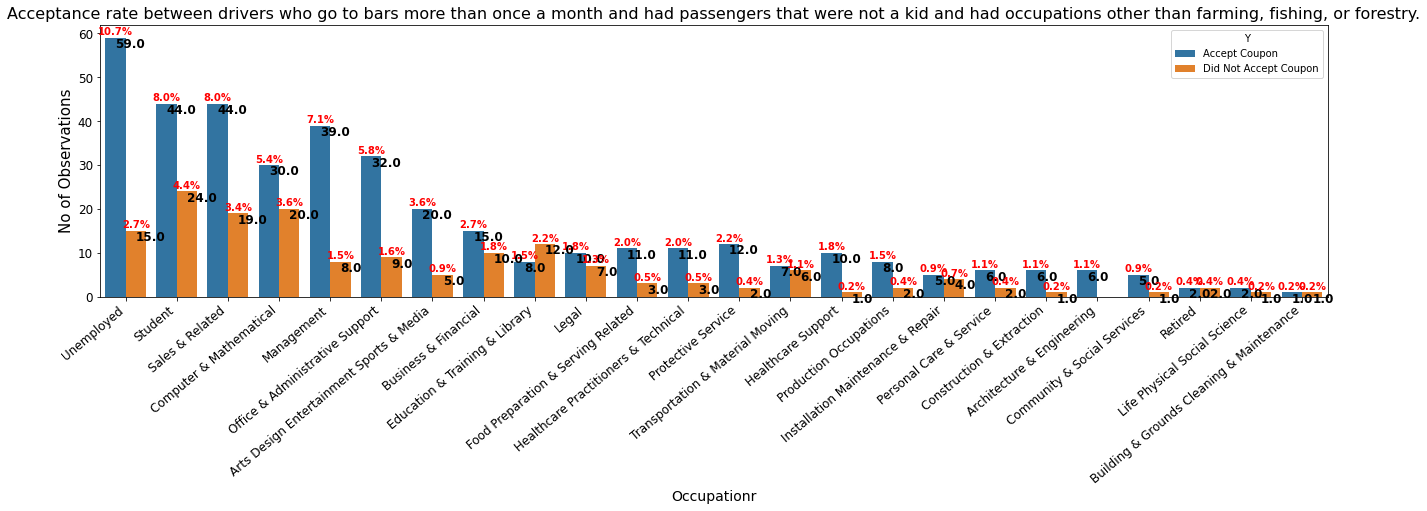

In [993]:
plt.figure(figsize =(22,5))
ax = sns.countplot(data =bar_coupons_morethanonce, x = 'occupation', hue = 'Y',order=bar_coupons_morethanonce['occupation'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('Occupationr', size = 14)
plt.yticks(size = 12)
plt.ylabel('No of Observations', size = 15)
plt.title("Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(bar_coupons_morethanonce)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=10,color='red')
    ax.annotate(value, (x, y),va='top',weight='bold',size=12)    
plt.show()

## 5. Conclusion: the highest rate of acceptance are Unemployed, followed by Student Sales & Related followed by Management and Office and Adminstrative Support.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



## go to bars more than once a month, had passengers that were not a kid, and were not widowed OR

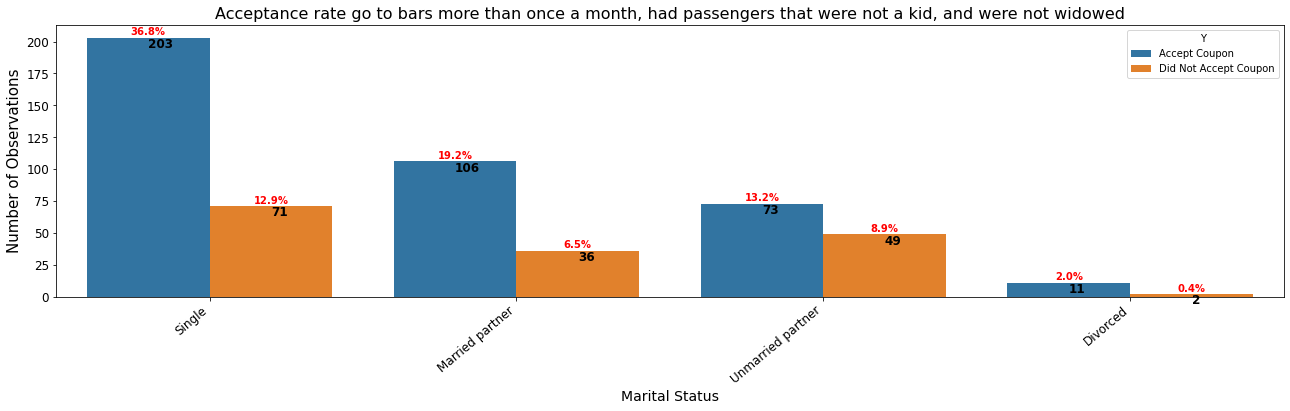

In [997]:
plt.figure(figsize =(22,5))
ax = sns.countplot(data =bar_coupons_morethanonce, x = 'maritalStatus', hue = 'Y',order=bar_coupons_morethanonce['maritalStatus'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('Marital Status', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of Observations', size = 15)
plt.title("Acceptance rate go to bars more than once a month, had passengers that were not a kid, and were not widowed", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(bar_coupons_morethanonce)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=10,color='red')
    ax.annotate(value, (x, y),va='top',weight='bold',size=12)    
plt.show()

## 6. Conculsion: Singles have more acceptance rate followed by married partner, then unmarried and lastly divorced.

## go to cheap restaurants more than 4 times a month and income is less than 50K.

In [974]:
option3 = ['Restaurant(<20)']
# selecting rows based on condition
cheaprest_coupons = data.loc[data['coupon'].isin(option3)]

In [975]:
##verify coupon acceptance status
uniqueValues = (bar_coupons_morethanonce['RestaurantLessThan20'].append(bar_coupons_morethanonce['RestaurantLessThan20'])).unique()
print(uniqueValues)

['0' '1-3' '>8' '4-8']


In [976]:
cheaprest_coupons=cheaprest_coupons.loc[cheaprest_coupons['RestaurantLessThan20'].isin([ '>8', '4-8'])]

In [977]:
replace_values2 = {'Less than $12500' : 'less than $50K', '$37500 - $49999' : 'less than $50K','$12500 - $24999' : 'less than $50K','$25000 - $37499': 'less than $50K'}                                                                                          
cheaprest_coupons = cheaprest_coupons.replace({"income": replace_values2})

In [978]:
uniqueValues = (cheaprest_coupons['RestaurantLessThan20'].append(cheaprest_coupons['RestaurantLessThan20'])).unique()
print(uniqueValues)

['4-8' '>8']


In [979]:
uniqueValues = (cheaprest_coupons['income'].append(cheaprest_coupons['income'])).unique()
print(uniqueValues)

['less than $50K' '$62500 - $74999' '$100000 or More' '$50000 - $62499'
 '$75000 - $87499' '$87500 - $99999']


In [980]:
for col in cheaprest_coupons:
    print(cheaprest_coupons[col].unique())

['No Urgent Place' 'Work' 'Home']
['None' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '6PM' '10AM' '7AM' '10PM']
['Restaurant(<20)']
['1d' '2h']
['Female' 'Male']
['21' '26' '31' '>=50' '36' '41' '46' '<21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['Yes' 'No']
['Some college - no degree' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'High School Graduate'
 'Associates degree' 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Healthcare Support'
 'Computer & Mathematical' 'Life Physical Social Science' 'Management'
 'Sales & Related' 'Student' 'Education & Training & Library' 'Legal'
 'Healthcare Practitioners & Technical' 'Retired'
 'Office & Administrative Support'
 'Arts Design Entertainment Sports & Media' 'Personal Care & Service'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Community & Social Services'
 'Construction & Extraction' 'Installation Maintenanc

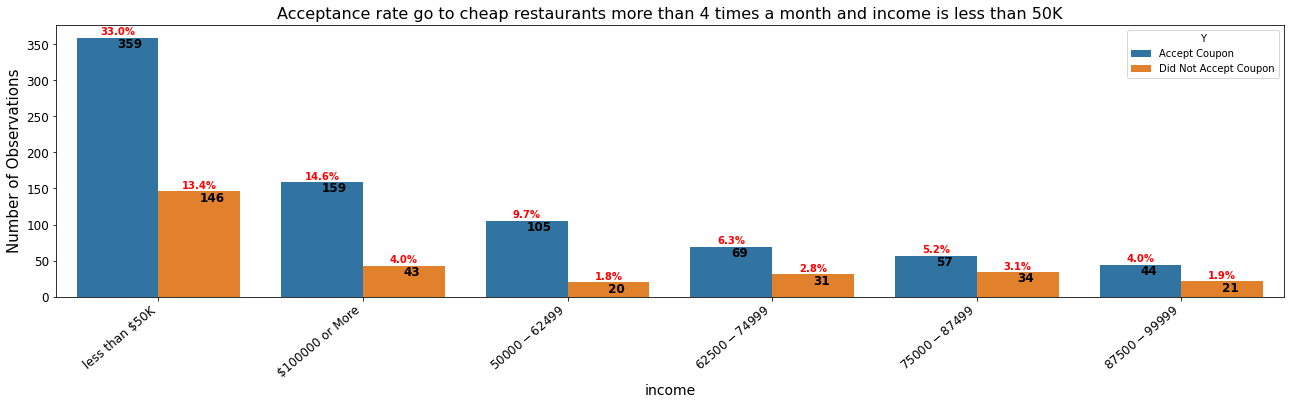

In [999]:
plt.figure(figsize =(22,5))
ax = sns.countplot(data =cheaprest_coupons, x='income',hue='Y',order=cheaprest_coupons['income'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('income', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of Observations', size = 15)
plt.title("Acceptance rate go to cheap restaurants more than 4 times a month and income is less than 50K", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(cheaprest_coupons)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=10,color='red')
    ax.annotate(value, (x, y),va='top',weight='bold',size=12)    
plt.show()

## Conclusion 6.higher percentage of coupon acceptance in this income group. 

## High percentage of coupon acceptance for those that have income less than $50K

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Based on the above observations, the acceptance rate of coupon increases based on the following :
## - lower income groups tend to use the coupons more for food purchases 
## - the marital status does influence the use of alcohol and therefore the singles tend to frequent bars and have a high acceptance rate
## - even the lack of a job does cause the use of more coupons to indulge in alcoholic beverages at bars as evidenced by the high unemployed acceptance of coupons
## - age and frequency of visiting bars also play a role in accepting coupons as younger patrons of bars who visit often tend to use coupons more

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## exploring coffeehouse coupons

In [982]:
## create a dataframe of only Bar coupons
optionX = ['Coffee House']
# selecting rows based on condition
CoffeeHouseCoupons = data.loc[data['coupon'].isin(optionX)]

In [984]:
##verify coupon acceptance status
uniqueValues = (CoffeeHouseCoupons['coupon'].append(CoffeeHouseCoupons['coupon'])).unique()
print(uniqueValues)

['Coffee House']


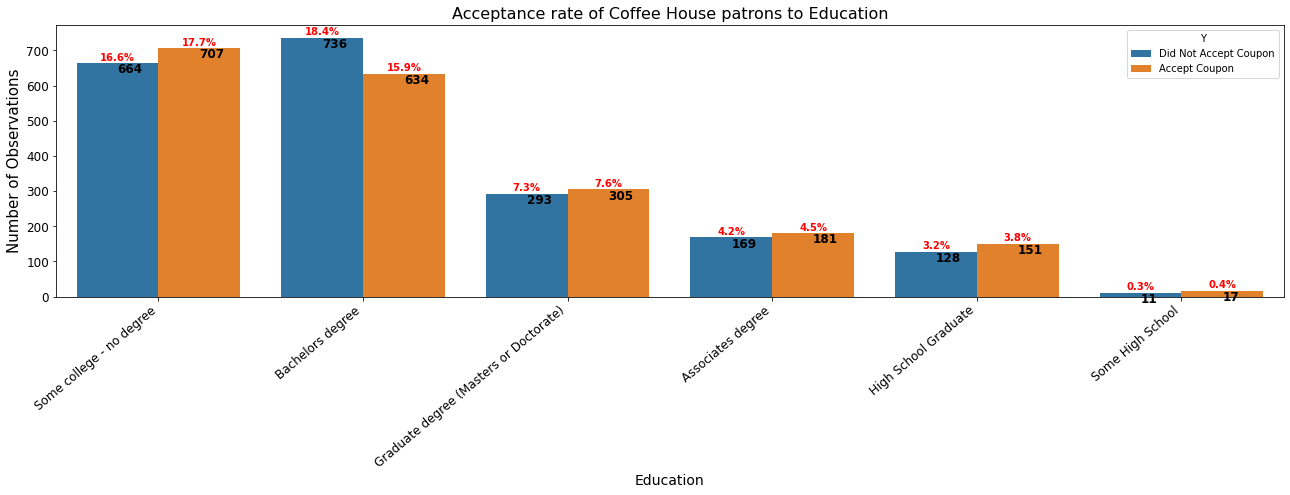

In [987]:
plt.figure(figsize =(22,5))
ax = sns.countplot(data =CoffeeHouseCoupons, x='education',hue='Y',order=CoffeeHouseCoupons['education'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('Education', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of Observations', size = 15)
plt.title("Acceptance rate of Coffee House patrons to Education", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(CoffeeHouseCoupons)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=10,color='red')
    ax.annotate(value, (x, y),va='top',weight='bold',size=12)    
plt.show()

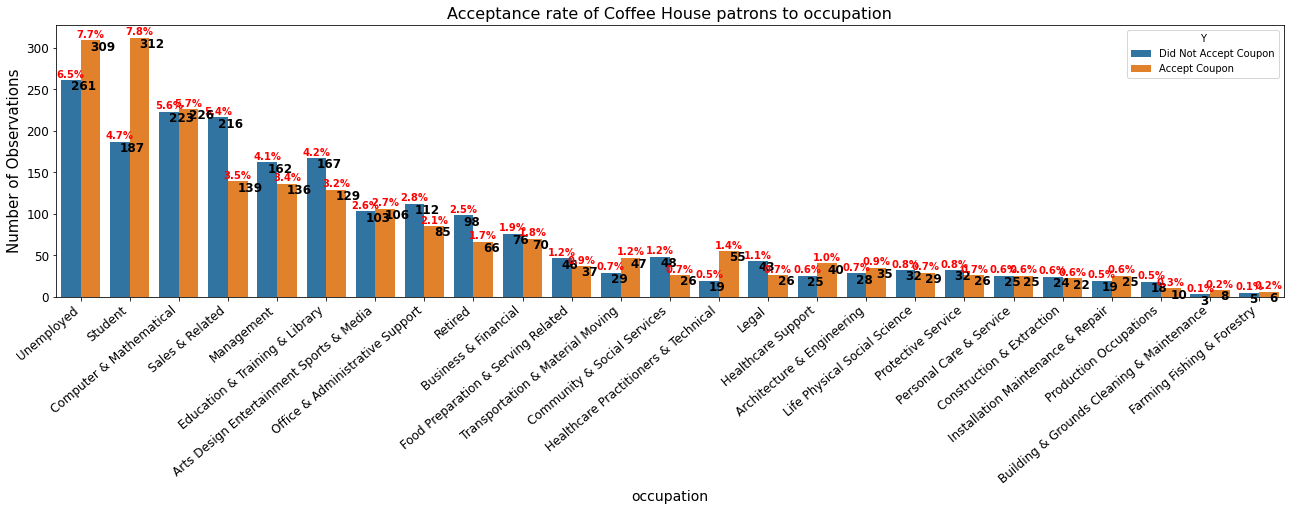

In [990]:
plt.figure(figsize =(22,5))
ax = sns.countplot(data =CoffeeHouseCoupons, x='occupation',hue='Y',order=CoffeeHouseCoupons['occupation'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('occupation', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of Observations', size = 15)
plt.title("Acceptance rate of Coffee House patrons to occupation", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(CoffeeHouseCoupons)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=10,color='red')
    ax.annotate(value, (x, y),va='top',weight='bold',size=12)    
plt.show()

## Higher acceptance rate of Coffee House coupons based on the following factors:
## - education level : close to half of the accepted coupons patrons were having some college, or bachelors or Graduate degree
## - occupation      : students and unemployed as well as computer and math related employees and sales folks tend to congregate at coffee house to network and spend time on their books for students.